In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from IPython.display import Audio as audio

- 녹음한 3가지 wav파일들을 각각 불러오고, 샘플링레이트와 각 신호의 길이를 확인하고 신호의 파형을 확인하자.

In [2]:
d1 = wavfile.read('Homework1/me.wav')
d2 = wavfile.read('Homework1/music.wav')
d3 = wavfile.read('Homework1/nature.wav')

In [3]:
print(d1[0]) # Sampling Rate
print(d1[1].shape) # (Number of samples, Number of channels)
print(d2[1].shape)
print(d3[1].shape)

Fs = d1[0]

if d1[1].shape[-1]==2:
    d1 = d1[1][:,0]
else:
    d1 = d1[1]

if d2[1].shape[-1]==2:
    d2 = d2[1][:,0]
else:
    d2 = d2[1]

if d3[1].shape[-1]==2:
    d3 = d3[1][:,0]
else:
    d3 = d3[1]


48000
(342912,)
(462080,)
(375840, 2)


In [4]:
print(d1.shape)
print(d2.shape)
print(d3.shape)

(342912,)
(462080,)
(375840,)


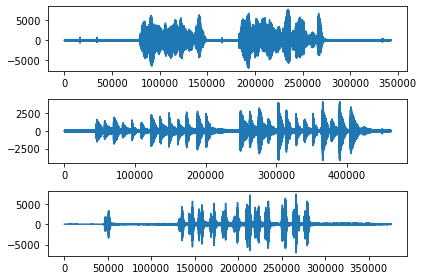

In [7]:
plt.subplot(311)
plt.plot(d1)
plt.subplot(312)
plt.plot(d2)
plt.subplot(313)
plt.plot(d3)
plt.tight_layout()
plt.show()

- 시간축에 대해 뒤집힌 신호를 생성하고 재생되는 소리를 확인해보자.

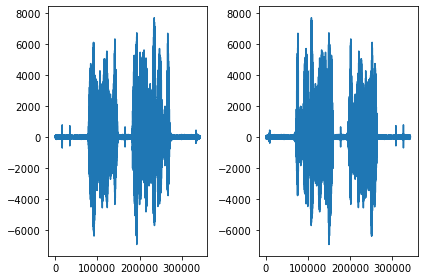

In [8]:
# reversal
orig_sig = d1
transformed_sig = orig_sig[::-1]

plt.subplot(121)
plt.plot(orig_sig)
plt.subplot(122)
plt.plot(transformed_sig)
plt.tight_layout()
plt.show()

audio(transformed_sig,rate=Fs)

- 시간축에 대해 압축된 신호를 생성하고, 재생되는 소리르 확인해보자.

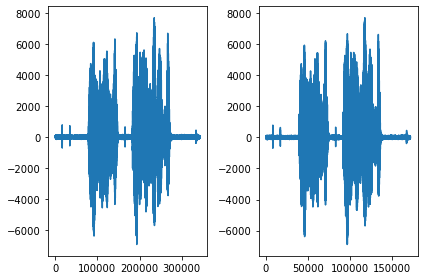

In [9]:
# Compression
orig_sig = d1
transformed_sig = orig_sig[::2]

plt.subplot(121)
plt.plot(orig_sig)
plt.subplot(122)
plt.plot(transformed_sig)
plt.tight_layout()
plt.show()

audio(transformed_sig,rate=Fs)

- 랜덤한 숫자가 곱해진 신호를 생성해보고, 재생되는 소리를 확인해보자.

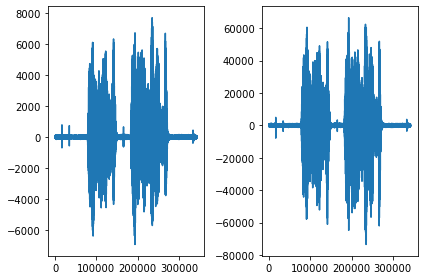

In [10]:
# multiplication by random numbers
orig_sig = d1
transformed_sig = orig_sig * np.random.randint(-10,10,orig_sig.shape)

plt.subplot(121)
plt.plot(orig_sig)
plt.subplot(122)
plt.plot(transformed_sig)
plt.tight_layout()
plt.show()

audio(transformed_sig,rate=Fs)

- 적절한 변환을 통해 세 개의 신호를 동일한 길이로 만든 후에 linear combination을 통해 새로운 신호를 생성하자.
- 실제 재생되는 소리를 확인하면서, 가장 마음에 드는 조합의 신호를 만들어보자.

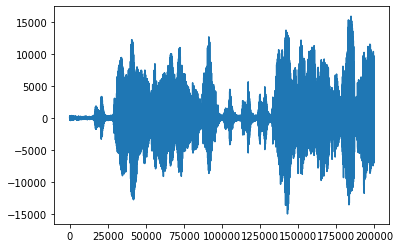

In [12]:
# weighted sum of my audio signals -> a linear combination
mysig = 2.*d1[50000:250000] + 0.1*d2[200000:400000] + 1*d3[30000:230000]
plt.plot(mysig)
plt.show()
audio(mysig, rate = Fs)

- 생성한 신호를 wsum.wav 파일로 저장하여 제출합니다.

In [13]:
wavfile.write('wsum.wav',Fs,np.int16(mysig))